[-0.01  -0.563 -0.54  -0.412 -0.244 -0.109  0.052  0.187  0.345  0.483
  0.595  0.71   0.868  1.118  1.276  1.661  2.003  2.207  2.411  2.5
  2.839]
Slope = 1.0254 ± 0.0033


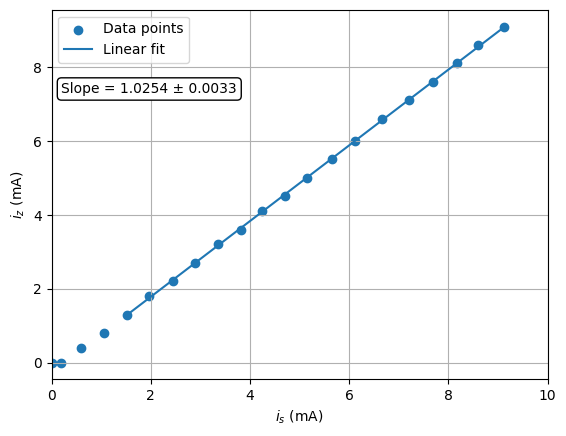

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Experimental data
Vin = np.array([0.01,1,2,3.01,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 19.98])
Is = np.array([0,-0.19,-0.6,-1.06,-1.52,-1.97,-2.44,-2.89,-3.35,
               -3.81,-4.25,-4.7,-5.16,-5.66,-6.12,-6.67, -7.21, -7.69, -8.17, -8.60, -9.13])
Iz = np.array([0,0,0.4,0.8,1.3,1.8,2.2,2.7,3.2,3.6,4.1,4.5,5.0,5.5,6.0,6.6, 7.1, 7.6, 8.1, 8.6, 9.1])
Vout = np.array([0.004,0.187,0.204,0.218,0.229,0.232,0.235,0.237,
                 0.239,0.240,0.242,0.243,0.245,0.246,0.247,0.243, 0.251, 0.252, 0.253, 0.254, 0.255])

VZ = Vin - 2.2 * np.abs(Is) - 0.1 *(np.abs(Is) + Iz)
#last term is for ammeter considerations

# Select breakdown region (Iz > 1 mA)
mask = Iz > 1
Is_fit = np.abs(Is[mask])
Iz_fit = Iz[mask]

# Linear fit with covariance
coeff, cov = np.polyfit(Is_fit, Iz_fit, 1, cov=True)
slope, intercept = coeff
slope_err = np.sqrt(cov[0,0])

print(f"Slope = {slope:.4f} ± {slope_err:.4f}")

# Plot iz vs is
plt.figure()
plt.scatter(np.abs(Is), Iz, label="Data points")
x = np.linspace(min(Is_fit), max(Is_fit), 100)
plt.plot(x, slope*x + intercept, label="Linear fit")
plt.xlabel(r"$i_s$ (mA)")
plt.ylabel(r"$i_z$ (mA)")
plt.xlim(0,10)
plt.text(0.2, 7.3, "Slope = 1.0254 ± 0.0033",bbox=dict(boxstyle="round", fc="white"))
plt.legend()
plt.grid(True)
plt.show()


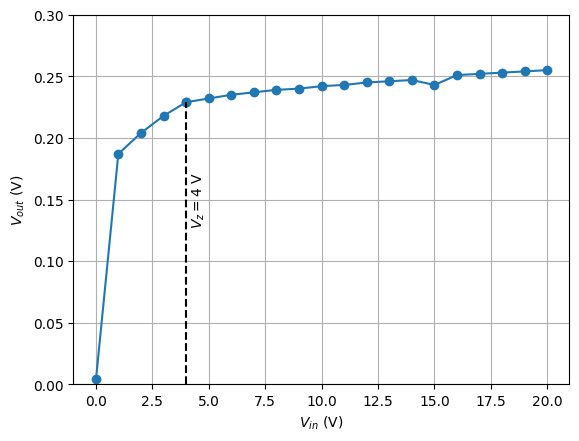

In [95]:

# Plot Vout vs Vin
plt.figure()
plt.plot(Vin, Vout, marker='o')
plt.xlabel(r"$V_{in}$ (V)")
plt.ylabel(r"$V_{out}$ (V)")
plt.vlines(x=4, ymin=0, ymax=0.229, linestyles='dashed', color='black')
plt.scatter(4, 0.229)
plt.ylim(0,0.3)
plt.text(4.2, 0.13, r"$V_{z}=4$ V", rotation=90)
plt.grid(True)
plt.show()


[0.33594028 0.65404512 0.99320883 1.23279099 1.55804481 1.77884615
 2.04866562 2.32718894 2.5753012  2.78230285 2.99126638 3.20586133
 3.43322818 3.60890576 3.81735005 4.01830283 4.18032787 4.35827153
 4.53709575 4.70358814]
Slope = -106.2857 ± 15.6031


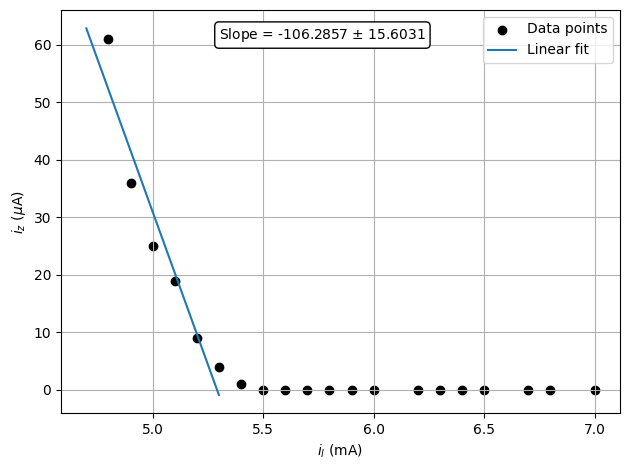

In [96]:
import numpy as np
import matplotlib.pyplot as plt

# Experimental data
RL = np.array([0.0504, 0.1003, 0.156, 0.197, 0.255, 0.296, 0.348, 0.404,
               0.456, 0.501, 0.548, 0.598, 0.653, 0.697, 0.751, 0.805,
               0.850, 0.901, 0.954, 1.005])

Il = np.array([7.0, 6.8, 6.7, 6.5, 6.4, 6.3, 6.2, 6.0, 5.9, 5.8,
               5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5.0, 4.9, 4.8])

Iz = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 4, 9, 19, 25, 36, 61])

Vout = np.array([0.38, 0.72, 1.06, 1.29, 1.62, 1.86, 2.14, 2.45,
                 2.70, 2.93, 3.16, 3.35, 3.57, 3.78, 3.99, 4.20,
                 4.37, 4.54, 4.72, 4.90])

Vdiode = 15 - 2.2*(15/(2.2 + RL))
print(Vdiode)
# Select breakdown region (Zener conducting)
mask = Iz > 1

Il_fit = np.abs(Il[mask])
Iz_fit = Iz[mask]

# Linear fit with uncertainty
coeff, cov = np.polyfit(Il_fit, Iz_fit, 1, cov=True)
slope, intercept = coeff
slope_err = np.sqrt(cov[0, 0])

print(f"Slope = {slope:.4f} ± {slope_err:.4f}")

# Plot
plt.scatter(Il, Iz, color='black', label="Data points")

x = np.linspace(min(Il_fit)-0.1, max(Il_fit), 100)
plt.plot(x, slope*x + intercept, label="Linear fit")

plt.xlabel(r"$i_l$ (mA)")
plt.ylabel(r"$i_z$ ($\mu$A)")

plt.text(max(Il_fit), max(Iz_fit),
         rf"Slope = {slope:.4f} $\pm$ {slope_err:.4f}",
         bbox=dict(boxstyle="round", fc="white"))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


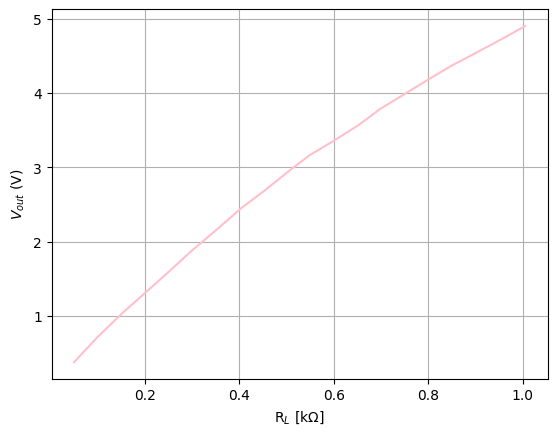

In [97]:
# Plot Vout vs Vin
plt.figure()
plt.plot(RL, Vout, color = 'pink')
plt.xlabel(r"R$_{L}$ [k$\Omega$]")
plt.ylabel(r"$V_{out}$ (V)")
plt.grid(True)
plt.show()

Slope (iz vs il) = -1.0694 ± 0.0468


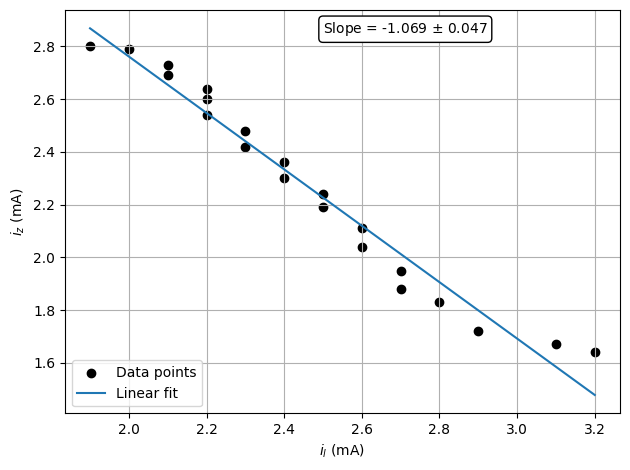

In [98]:
import numpy as np
import matplotlib.pyplot as plt

RL = np.array([
0.001, 0.0576, 0.1035, 0.1561, 0.196, 0.254,
0.300, 0.354, 0.404, 0.451, 0.504, 0.548,
0.597, 0.654, 0.698, 0.748, 0.800,0.852, 0.900,0.947, 1.005
])
Il = np.array([
3.2, 3.1, 2.9, 2.8, 2.7, 2.7,
2.6, 2.6, 2.5, 2.5, 2.4, 2.4,
2.3, 2.3, 2.2, 2.2, 2.2, 2.1,2.1,2.0, 1.9
])
Iz = np.array([
1.64, 1.67, 1.72, 1.83, 1.88, 1.95,
2.04, 2.11, 2.19, 2.24, 2.30, 2.36,
2.42, 2.48, 2.54, 2.60, 2.64,2.69, 2.73 ,2.79, 2.80
])
Vout = np.array([
6.50, 6.52, 6.53, 6.50, 6.51, 6.51,
6.53, 6.52, 6.51, 6.52, 6.52, 6.51,
6.52, 6.52, 6.52, 6.51, 6.51,6.50, 6.52, 6.51,6.52
])


# Linear fit: Iz vs Il
coeff, cov = np.polyfit(Il, Iz, 1, cov=True)
slope, intercept = coeff
slope_err = np.sqrt(cov[0,0])

print(f"Slope (iz vs il) = {slope:.4f} ± {slope_err:.4f}")

# Plot
plt.scatter(Il, Iz, color='black', label='Data points')

x = np.linspace(min(Il), max(Il), 100)
plt.plot(x, slope*x + intercept, label='Linear fit')

plt.xlabel(r"$i_l$ (mA)")
plt.ylabel(r"$i_z$ (mA)")
plt.text(2.5, 2.85,
         rf"Slope = {slope:.3f} $\pm$ {slope_err:.3f}",
         bbox=dict(boxstyle="round", fc="white"))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Slope = -1.06940 ± 0.00648 V/kΩ


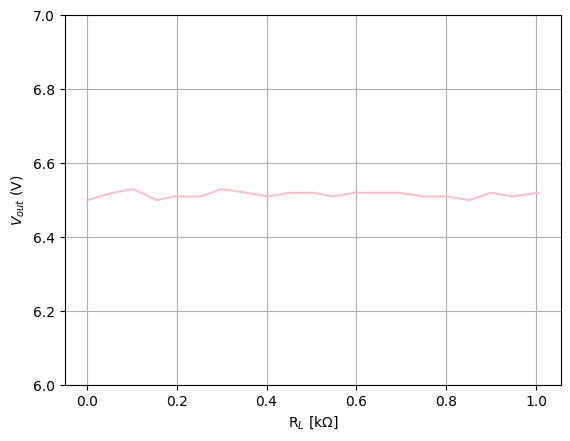

In [99]:
# Plot Vout vs Vin
eff, cov = np.polyfit(RL, Vout, 1, cov=True)
slope, intercept = coeff
slope_err = np.sqrt(cov[0,0])

print(f"Slope = {slope:.5f} ± {slope_err:.5f} V/kΩ")

plt.figure()
plt.plot(RL, Vout, color = 'pink')
plt.xlabel(r"R$_{L}$ [k$\Omega$]")
plt.ylabel(r"$V_{out}$ (V)")
plt.ylim(6,7)
plt.grid(True)
plt.show()

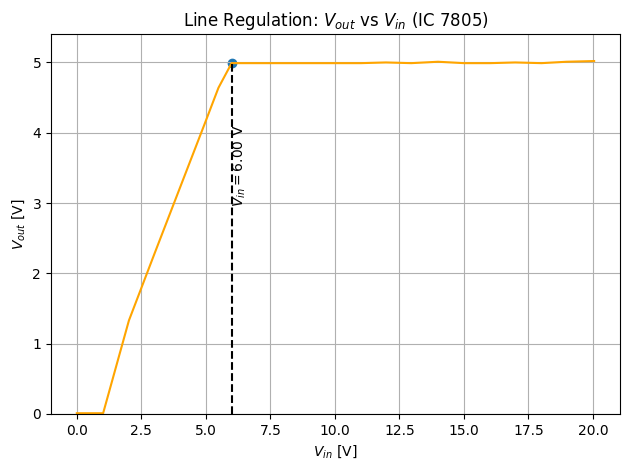

In [100]:
Vin = np.array([0,1.02,2.02,3.00,4.00,4.99,5.49,6.00,7.00,8.00,9.01,10.02,11.01,11.98,12.96,14.00,15.01,16.02,16.99,18.01,18.98,20.05])

Vout = np.array([0.01,0.01,1.33,2.27,3.22,4.16,4.64,4.99,
                 4.99,4.99,4.99,4.99,4.99,5.00,4.99,5.01,4.99,
                 4.99,5.00,4.99,5.01,5.02])

#print(len(Vin), len(Vout))

# Plot
plt.plot(Vin, Vout, color='orange', label='Data points')
plt.vlines(x=6.00, ymin=0, ymax=4.99, linestyles='dashed', color='black')
plt.scatter(6.00, 4.99)
plt.xlabel(r"$V_{in}$ [V]")
plt.ylabel(r"$V_{out}$ [V]")
plt.title(r"Line Regulation: $V_{out}$ vs $V_{in}$ (IC 7805)")
plt.text(6.00, 3.00, r"$V_{in}=6.00$ V", rotation=90)
plt.grid(True)
plt.ylim(0,5.4)
plt.tight_layout()
plt.show()


Slope = -0.00152 ± 0.00341 V/kΩ


C:\Users\SAWINI JANA\AppData\Local\Temp\ipykernel_14652\1726147601.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


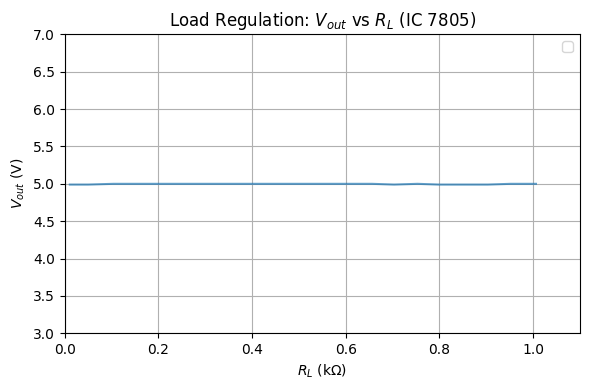

In [101]:
RL = np.array([
0.011, 0.050, 0.104, 0.153, 0.205, 0.251,
0.302, 0.352, 0.402, 0.454, 0.506, 0.556,
0.607, 0.656, 0.703, 0.753, 0.799, 0.846,
0.903, 0.952, 1.006
])
Vout = np.array([
4.99, 4.99, 5.00, 5.00, 5.00, 5.00,
5.00, 5.00, 5.00, 5.00, 5.00, 5.00,
5.00, 5.00, 4.99, 5.00, 4.99, 4.99,
4.99, 5.00, 5.00
])

coeff, cov = np.polyfit(RL, Vout, 1, cov=True)
slope, intercept = coeff
slope_err = np.sqrt(cov[0,0])

print(f"Slope = {slope:.5f} ± {slope_err:.5f} V/kΩ")

# Plot
plt.figure(figsize=(6,4))
plt.plot(RL, Vout, linestyle='-', alpha=0.7)

plt.xlabel(r"$R_L$ (k$\Omega$)")
plt.ylabel(r"$V_{out}$ (V)")
plt.ylim(3,7)
plt.xlim(0.0,1.1)
plt.title(r"Load Regulation: $V_{out}$ vs $R_L$ (IC 7805)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
